In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix,classification_report

In [14]:
data=pd.read_json('News_Category_Dataset_v3.json',lines=True)

In [15]:
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [16]:
data.shape

(209527, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [18]:
data['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

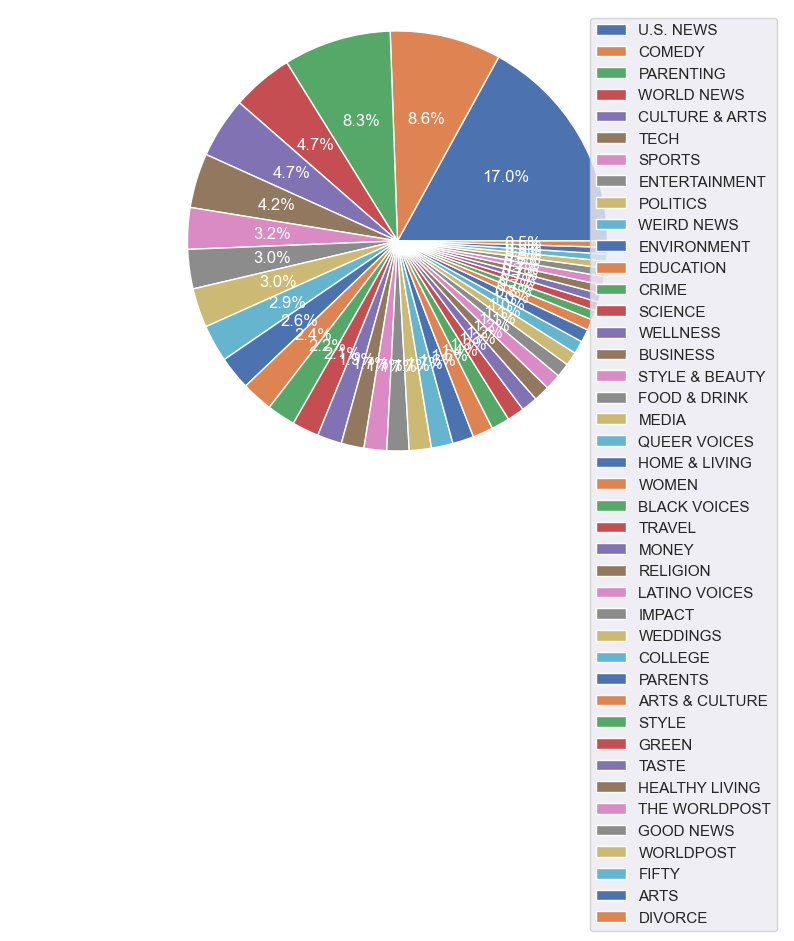

In [19]:
plt.figure(figsize=(10,6))
plt.pie(data['category'].value_counts(), labels=data['category'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

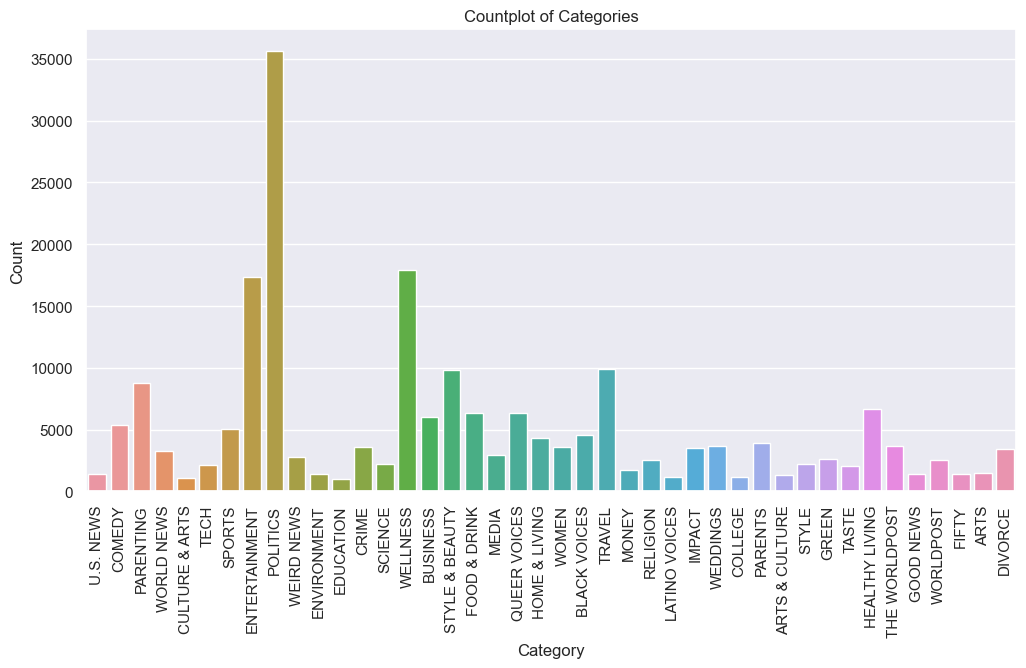

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Countplot of Categories')
plt.show()

In [21]:
dict(enumerate(data['category'].unique()))

{0: 'U.S. NEWS',
 1: 'COMEDY',
 2: 'PARENTING',
 3: 'WORLD NEWS',
 4: 'CULTURE & ARTS',
 5: 'TECH',
 6: 'SPORTS',
 7: 'ENTERTAINMENT',
 8: 'POLITICS',
 9: 'WEIRD NEWS',
 10: 'ENVIRONMENT',
 11: 'EDUCATION',
 12: 'CRIME',
 13: 'SCIENCE',
 14: 'WELLNESS',
 15: 'BUSINESS',
 16: 'STYLE & BEAUTY',
 17: 'FOOD & DRINK',
 18: 'MEDIA',
 19: 'QUEER VOICES',
 20: 'HOME & LIVING',
 21: 'WOMEN',
 22: 'BLACK VOICES',
 23: 'TRAVEL',
 24: 'MONEY',
 25: 'RELIGION',
 26: 'LATINO VOICES',
 27: 'IMPACT',
 28: 'WEDDINGS',
 29: 'COLLEGE',
 30: 'PARENTS',
 31: 'ARTS & CULTURE',
 32: 'STYLE',
 33: 'GREEN',
 34: 'TASTE',
 35: 'HEALTHY LIVING',
 36: 'THE WORLDPOST',
 37: 'GOOD NEWS',
 38: 'WORLDPOST',
 39: 'FIFTY',
 40: 'ARTS',
 41: 'DIVORCE'}

In [22]:
mapping=dict(enumerate(data['category'].unique()))
LABEL_MAPPING={value: key for key,value in mapping.items()}
LABEL_MAPPING

{'U.S. NEWS': 0,
 'COMEDY': 1,
 'PARENTING': 2,
 'WORLD NEWS': 3,
 'CULTURE & ARTS': 4,
 'TECH': 5,
 'SPORTS': 6,
 'ENTERTAINMENT': 7,
 'POLITICS': 8,
 'WEIRD NEWS': 9,
 'ENVIRONMENT': 10,
 'EDUCATION': 11,
 'CRIME': 12,
 'SCIENCE': 13,
 'WELLNESS': 14,
 'BUSINESS': 15,
 'STYLE & BEAUTY': 16,
 'FOOD & DRINK': 17,
 'MEDIA': 18,
 'QUEER VOICES': 19,
 'HOME & LIVING': 20,
 'WOMEN': 21,
 'BLACK VOICES': 22,
 'TRAVEL': 23,
 'MONEY': 24,
 'RELIGION': 25,
 'LATINO VOICES': 26,
 'IMPACT': 27,
 'WEDDINGS': 28,
 'COLLEGE': 29,
 'PARENTS': 30,
 'ARTS & CULTURE': 31,
 'STYLE': 32,
 'GREEN': 33,
 'TASTE': 34,
 'HEALTHY LIVING': 35,
 'THE WORLDPOST': 36,
 'GOOD NEWS': 37,
 'WORLDPOST': 38,
 'FIFTY': 39,
 'ARTS': 40,
 'DIVORCE': 41}

In [23]:
NUM_CLASSES=len(LABEL_MAPPING)
print("# of classes: ",NUM_CLASSES)

# of classes:  42


## Preprocessing

In [24]:
def get_sequences(texts,tokenizer,train=True,max_seq_length=0):
    sequences = tokenizer.texts_to_sequences(texts)

    if train==True:
        max_seq_length=np.max(list(map(lambda x:len(x),sequences)))
    
    sequences=pad_sequences(sequences,maxlen=max_seq_length,padding='post')
    
    return sequences

In [25]:
def preprocess_inputs(df, label_mapping=None):
    df = df.copy()
    
    # Use only the headline and category columns
    df = df.loc[:, ['headline', 'category']]
    
    # Sample 1000 examples from each category
    category_samples = []
    
    for category in df['category'].unique():
        category_slice = df.query("category == @category")
        category_samples.append(category_slice.sample(1000, random_state=1))
    df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
    
    # Map the labels to integers
    df['category'] = df['category'].replace(label_mapping)
    
    # Split df into X and y
    y = df['category']
    X = df['headline']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Fit a tokenizer
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(X_train)
    
    # Get sequence data
    X_train = get_sequences(X_train, tokenizer, train=True)
    X_test = get_sequences(X_test, tokenizer, train=False, max_seq_length=X_train.shape[1])
    
    return X_train, X_test, y_train, y_test

In [26]:
X_train,X_test,y_train,y_test=preprocess_inputs(data,label_mapping=LABEL_MAPPING)

In [27]:
X_train

array([[ 332,  168,  409, ...,    0,    0,    0],
       [   1, 6024,  499, ...,    0,    0,    0],
       [ 323,   19,  781, ...,    0,    0,    0],
       ...,
       [ 544,   36,  667, ...,    0,    0,    0],
       [1547,  153,    9, ...,    0,    0,    0],
       [1728,   29,  691, ...,    0,    0,    0]])

In [28]:
y_train.value_counts()

1     730
16    719
13    715
14    713
12    713
39    713
27    712
31    712
32    711
22    710
17    710
23    707
11    707
24    707
20    707
30    707
0     707
26    707
29    705
33    704
34    703
37    700
8     700
18    700
38    700
21    699
41    698
7     695
28    693
35    692
2     691
36    689
25    686
40    686
19    686
15    685
5     684
10    683
9     683
3     681
6     680
4     669
Name: category, dtype: int64

In [29]:
X_train.shape

(29399, 26)

In [30]:
X_test.shape

(12601, 26)

## Modeling

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 embedding (Embedding)       (None, 26, 64)            640000    
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 128)               213120    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 42)                5418      
                                                                 
Total params: 875,050
Trainable params: 875,050
Non-trainable

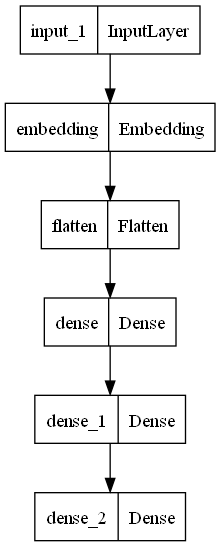

In [31]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

embedding = tf.keras.layers.Embedding(input_dim=10000,output_dim=64)(inputs)

flatten = tf.keras.layers.Flatten()(embedding)

dense_1 = tf.keras.layers.Dense(128, activation='relu')(flatten)
dense_2 = tf.keras.layers.Dense(128, activation='relu')(dense_1)

outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(dense_2)


model = tf.keras.Model(inputs, outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

## Training

## TensorFlow / Keras Neural Network

In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
735/735 [==============================] - 19s 22ms/step - loss: 3.4470 - accuracy: 0.0881 - val_loss: 2.9258 - val_accuracy: 0.2133
Epoch 2/100
735/735 [==============================] - 12s 16ms/step - loss: 2.3315 - accuracy: 0.3558 - val_loss: 2.6093 - val_accuracy: 0.3077
Epoch 3/100
735/735 [==============================] - 12s 16ms/step - loss: 1.2570 - accuracy: 0.6508 - val_loss: 2.9721 - val_accuracy: 0.3105
Epoch 4/100
735/735 [==============================] - 12s 16ms/step - loss: 0.4990 - accuracy: 0.8672 - val_loss: 3.9513 - val_accuracy: 0.2946
Epoch 5/100
735/735 [==============================] - 12s 16ms/step - loss: 0.1797 - accuracy: 0.9555 - val_loss: 4.8439 - val_accuracy: 0.2794


## Result

In [33]:
print("Test Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

Test Accuracy: 30.85%


394/394 [==============================] - 1s 1ms/step


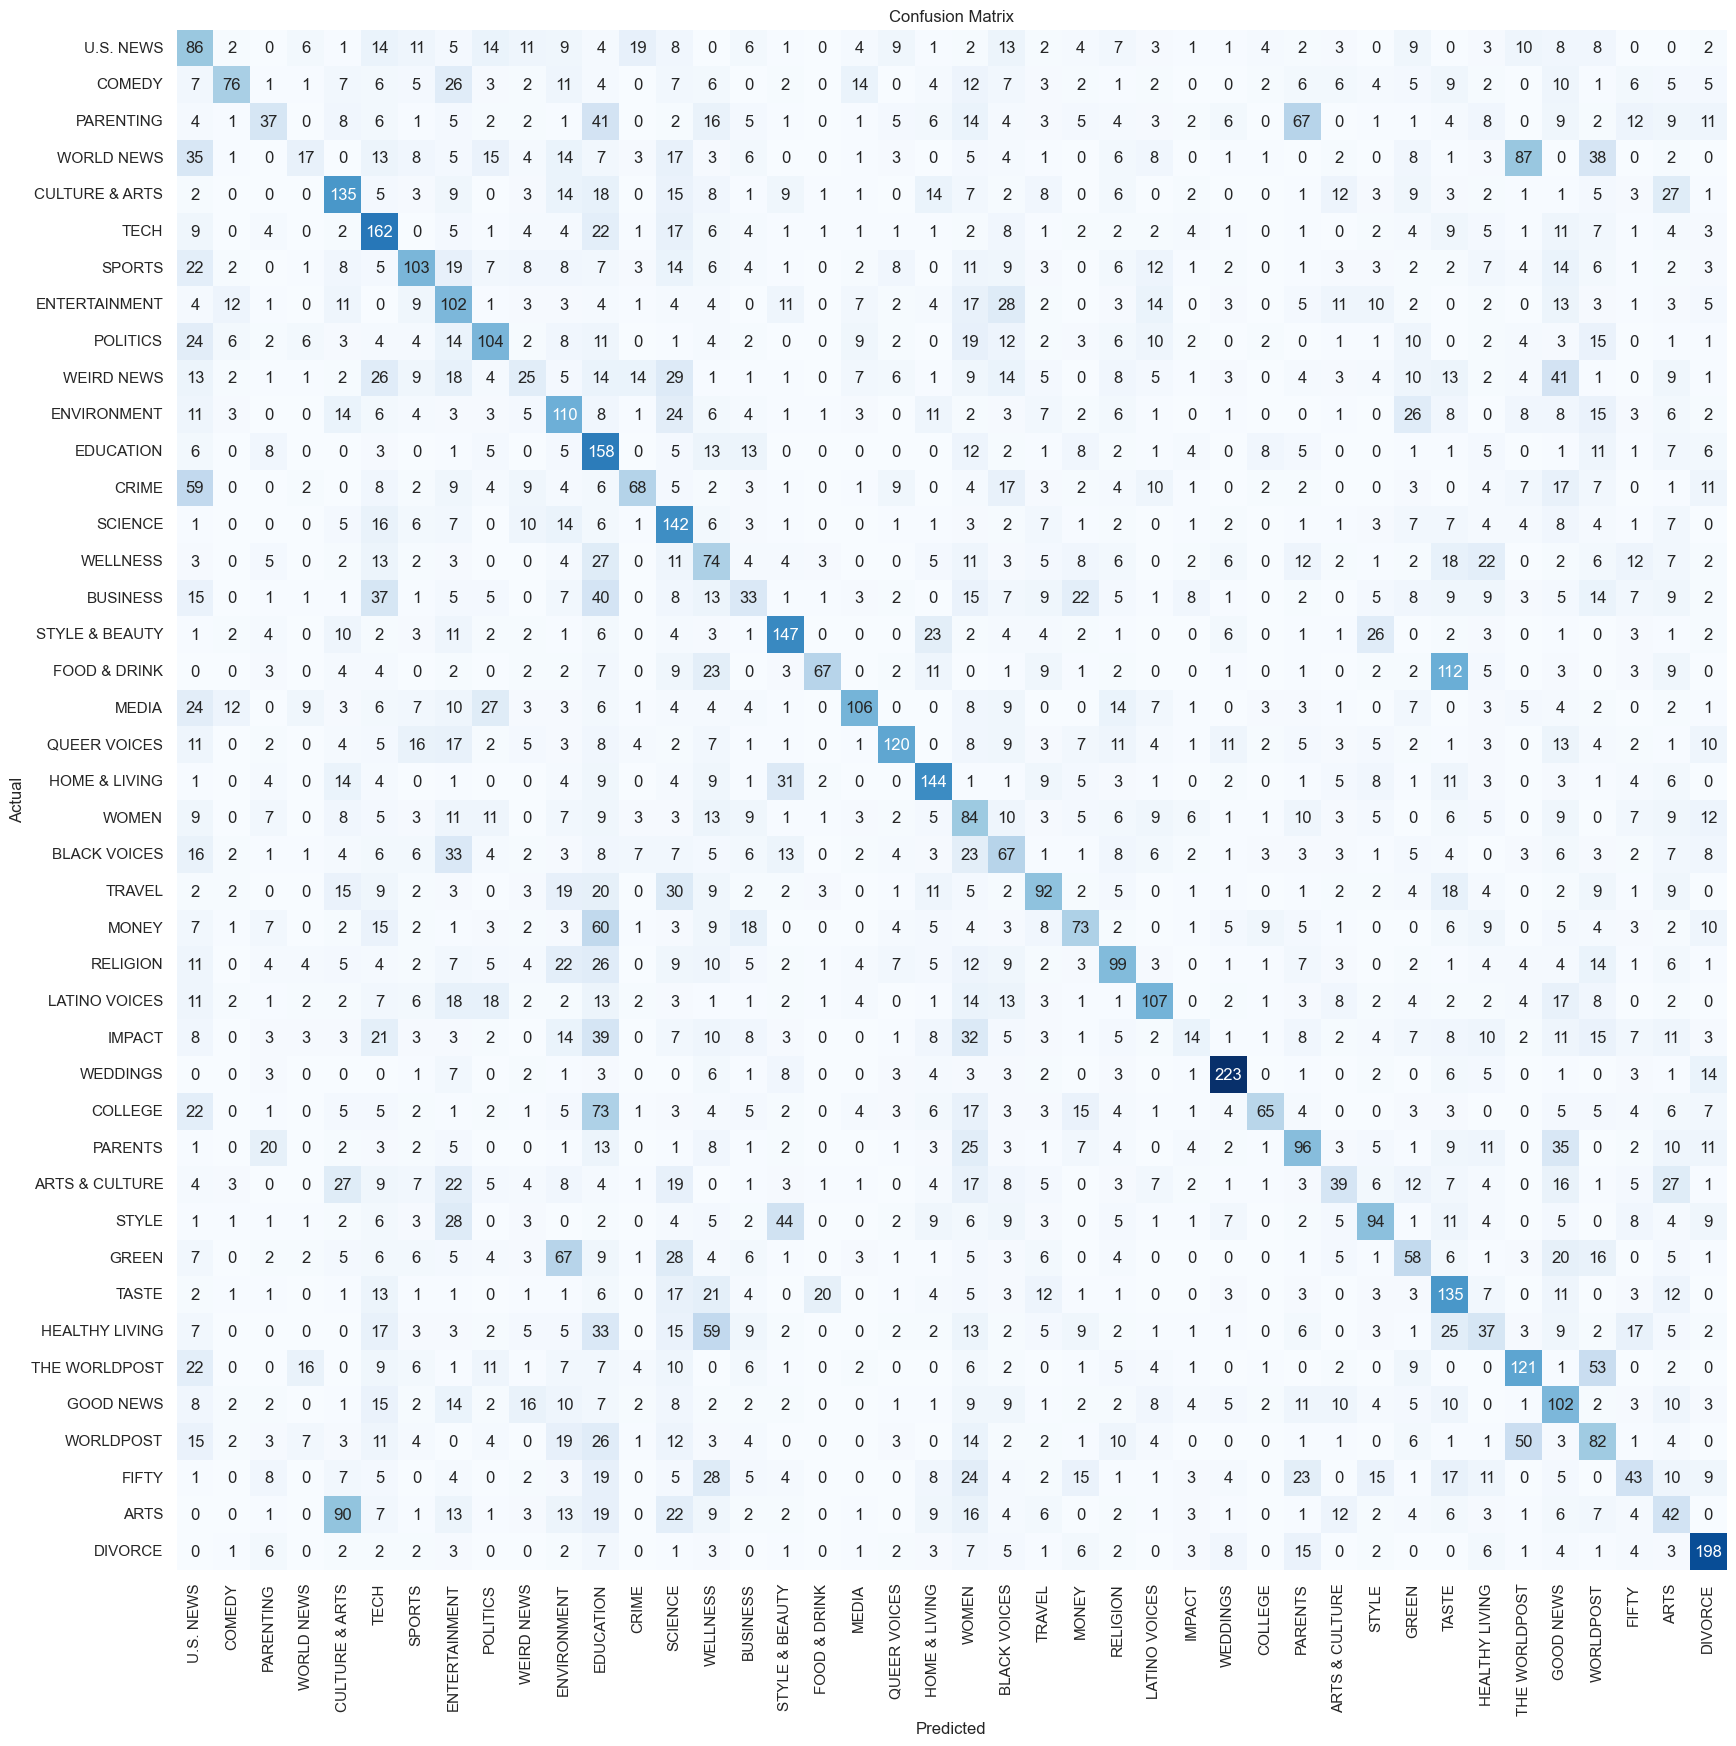

In [34]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=list(LABEL_MAPPING.keys()))

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(NUM_CLASSES) + 0.5, labels=list(LABEL_MAPPING.keys()), rotation=90)
plt.yticks(ticks=np.arange(NUM_CLASSES) + 0.5, labels=list(LABEL_MAPPING.keys()), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                 precision    recall  f1-score   support

     U.S. NEWS       0.17      0.29      0.22       293
        COMEDY       0.56      0.28      0.37       270
     PARENTING       0.26      0.12      0.16       309
    WORLD NEWS       0.21      0.05      0.09       319
CULTURE & ARTS       0.32      0.41      0.36       331
          TECH       0.31      0.51      0.39       316
        SPORTS       0.40      0.32      0.36       320
 ENTERTAINMENT       0.22      0.33      0.27       305
      POLITICS       0.38      0.35      0.36       300
    WEIRD NEWS       0.16      0.08      0.11       317
   ENVIRONMENT       0.25      0.35      0.29       317
     EDUCATION       0.19      0.54      0.28       293
         CRIME       0.49      0.24      0.32       287
       SCIENCE       0.26      0.50      0.34       285
      WELLNESS       0.17      0.26      0.21       287
      BUSINESS       0.17      0.10      0.13       315


## Random Forest

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
import ijson
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [37]:
data['News_length']=data['short_description'].str.len()
data['News_length']

0         154
1         159
2          64
3         159
4         156
         ... 
209522    124
209523    122
209524    121
209525    120
209526    122
Name: News_length, Length: 209527, dtype: int64

## Distribution Plot

Text(0.5, 1.0, 'News length distribution')

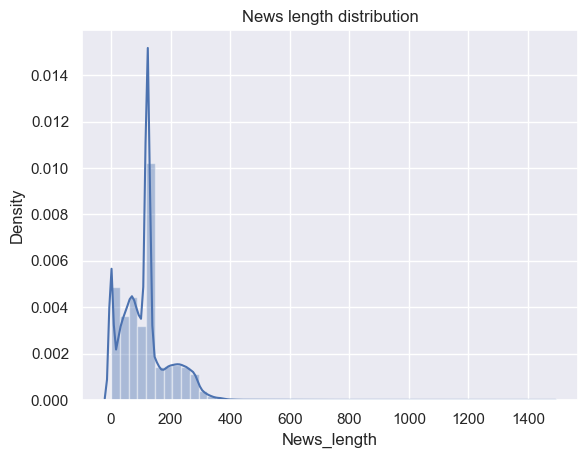

In [38]:
sns.distplot(data['News_length']).set_title('News length distribution')

## WordCloud

In [39]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()

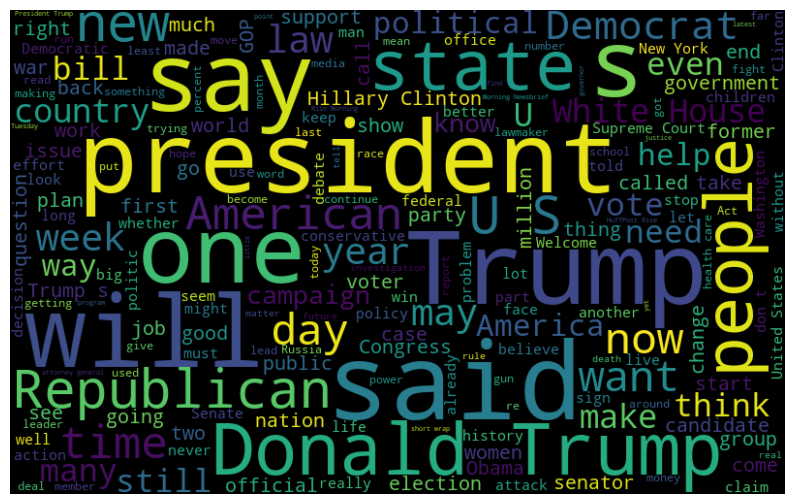

In [40]:
subset=data[data.category=="POLITICS"]
text=subset.short_description.values
words =" ".join(text)
create_wordcloud(words)

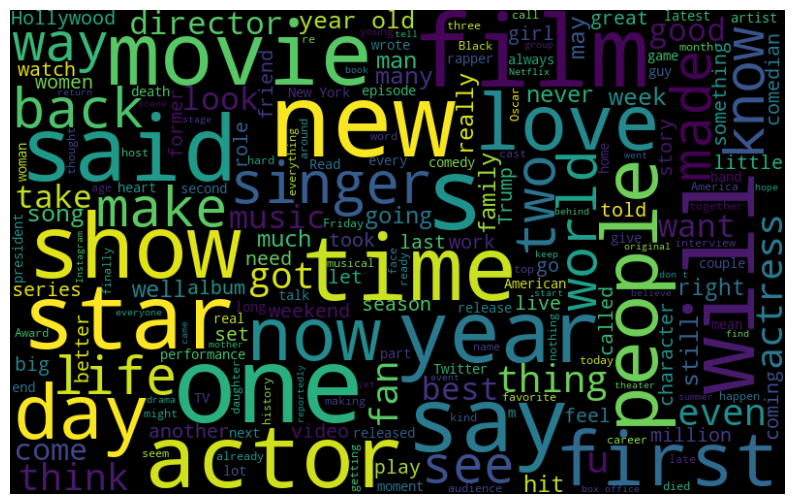

In [41]:
subset=data[data.category=="ENTERTAINMENT"]
text=subset.short_description.values
words =" ".join(text)
create_wordcloud(words)

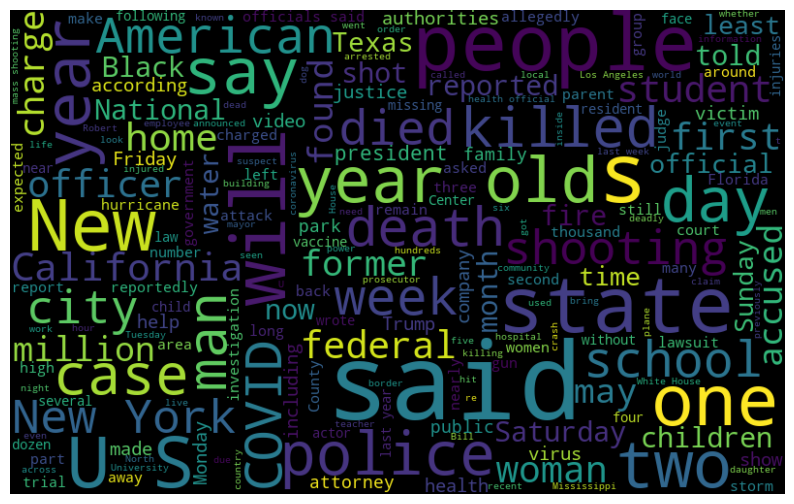

In [42]:
subset=data[data.category=="U.S. NEWS"]
text=subset.short_description.values
words =" ".join(text)
create_wordcloud(words)

## Feature Engineering

In [43]:
## Removing Punctuation and Stopwords
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [44]:
data['Text_parsed_short_description'] = data['short_description'].apply(process_text)
data['Text_parsed_headline'] = data['headline'].apply(process_text)

In [45]:
data.head()

,link,headline,category,short_description,authors,date,News_length,Text_parsed_short_description,Text_parsed_headline
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,154,health experts said early predict whether dema...,4 million americans roll sleeves omicrontarget...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,159,subdued passengers crew fled back aircraft con...,american airlines flyer charged banned life pu...
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,64,dog dont understand could eaten,23 funniest tweets cats dogs week sept 1723
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,159,accidentally put grownup toothpaste toddlers t...,funniest tweets parents week sept 1723
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,156,amy cooper accused investment firm franklin te...,woman called cops black birdwatcher loses laws...


## Label Encoding

In [46]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['category_target']=label_encoder.fit_transform(data['category'])

In [47]:
data.head()

,link,headline,category,short_description,authors,date,News_length,Text_parsed_short_description,Text_parsed_headline,category_target
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,154,health experts said early predict whether dema...,4 million americans roll sleeves omicrontarget...,35
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,159,subdued passengers crew fled back aircraft con...,american airlines flyer charged banned life pu...,35
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,64,dog dont understand could eaten,23 funniest tweets cats dogs week sept 1723,5
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,159,accidentally put grownup toothpaste toddlers t...,funniest tweets parents week sept 1723,22
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,156,amy cooper accused investment firm franklin te...,woman called cops black birdwatcher loses laws...,35


## Traning And Testing

In [48]:
X = data[['Text_parsed_short_description','Text_parsed_headline']]
X = X.iloc[:,0]

y = data['category_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [49]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(41906, 300)


## Result

In [52]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.26063093590416647
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.03      0.01      0.01       271
           2       0.23      0.11      0.15       859
           3       0.16      0.06      0.09      1198
           4       0.00      0.00      0.00       214
           5       0.11      0.03      0.05      1077
           6       0.18      0.09      0.12       663
           7       0.06      0.01      0.02       211
           8       0.59      0.31      0.40       666
           9       0.05      0.01      0.02       202
          10       0.19      0.17      0.18      3442
          11       0.11      0.04      0.06       272
          12       0.00      0.00      0.00       266
          13       0.16      0.13      0.14      1255
          14       0.06      0.01      0.01       267
          15       0.04      0.01      0.01       529
          16       0.11      0.02      0.04      1